In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta a la carpeta del dataset
carpeta = '/content/drive/MyDrive/TEST/dataset'

Mounted at /content/drive


Found 4398 images belonging to 11 classes.
Found 1099 images belonging to 11 classes.


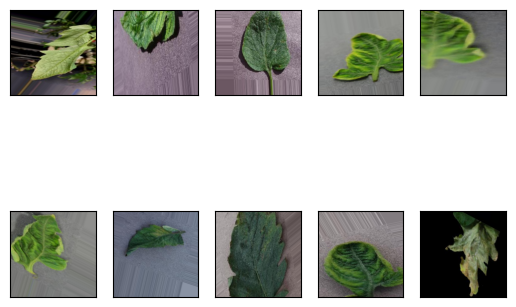

In [2]:
#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5,1.5],
    validation_split = 0.2
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory(carpeta,target_size=(224,224),
                                                     batch_size=32,shuffle = True, subset='training')
data_gen_pruebas = datagen.flow_from_directory(carpeta,target_size=(224,224),
                                                       batch_size=32,shuffle = True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [3]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(224,224,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = 'relu'),

    #tf.keras.layers.Dense(units=50, activation='relu'),
    #tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [4]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 100)               1

In [5]:
#compilar el modelo

modelo.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

Epoch 1/50
138/138 [==============================] - 94s 681ms/step - loss: 0.9198 - accuracy: 0.6860 - val_loss: 0.8452 - val_accuracy: 0.7079
Epoch 2/50
138/138 [==============================] - 91s 657ms/step - loss: 0.9074 - accuracy: 0.6912 - val_loss: 0.8485 - val_accuracy: 0.7088
Epoch 3/50
138/138 [==============================] - 97s 706ms/step - loss: 0.8496 - accuracy: 0.7083 - val_loss: 0.7035 - val_accuracy: 0.7716
Epoch 4/50
138/138 [==============================] - 90s 654ms/step - loss: 0.7936 - accuracy: 0.7258 - val_loss: 0.6408 - val_accuracy: 0.7934
Epoch 5/50
138/138 [==============================] - 90s 650ms/step - loss: 0.7710 - accuracy: 0.7281 - val_loss: 0.7664 - val_accuracy: 0.7498
Epoch 6/50
138/138 [==============================] - 91s 662ms/step - loss: 0.8141 - accuracy: 0.7231 - val_loss: 0.7971 - val_accuracy: 0.7343
Epoch 7/50
138/138 [==============================] - 95s 691ms/step - loss: 0.7333 - accuracy: 0.7517 - val_loss: 0.7022 - val_ac

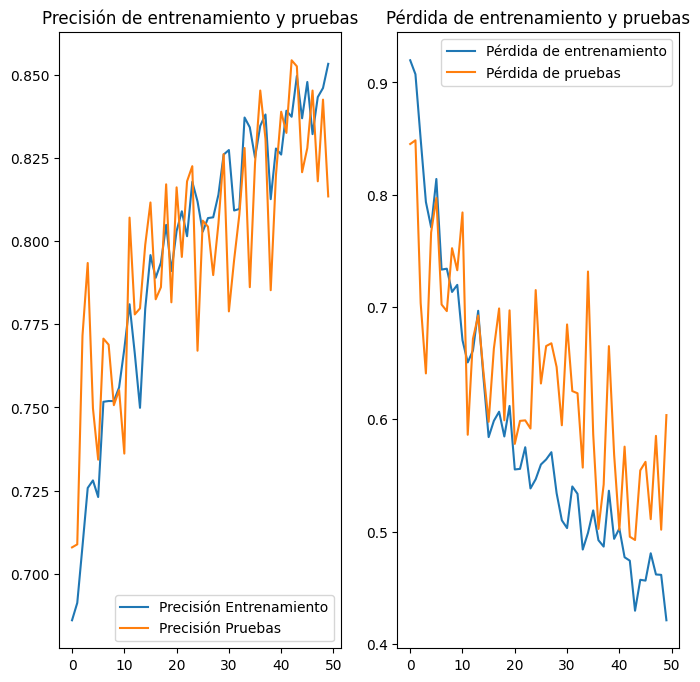

In [8]:
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento,
    epochs = EPOCAS,
    batch_size=32,
    validation_data = data_gen_pruebas
)

# Gráficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()
